# Exercise 1: Graph Making

Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![](exercise2.png)

['A', 'C', 'E', 'D', 'B']


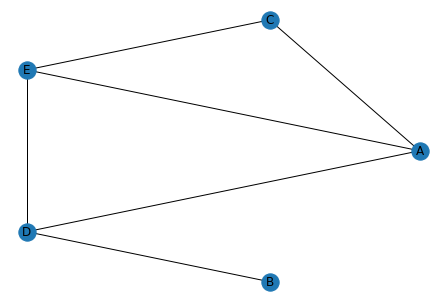

In [45]:
import networkx as nx

def make_simple_graph():
    G = nx.Graph([])
    G.add_edge("A","C")
    G.add_edge("A","E")
    G.add_edge("C","E")
    G.add_edge("D","E")
    G.add_edge("A","D")
    G.add_edge("B","D")
    return G

G = make_simple_graph()
print(G.nodes)
nx.draw_shell(G, with_labels=True)

## Exercise 1.2: computing diameter and node degrees of graphs

For the graph made by your function in the previous exercise, calculate the diameter and the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use a networkx function or method to compute the diameter or degrees. They have to be calculated yourself

```

compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}

In [99]:
from itertools import combinations 

class Node:
    
    def __init__(self, _id):
        self._id = _id
        self.neighbors = set()
        self.degrees = len(self.neighbors)
        
    def add_edge(self, to):
        if to not in self.neighbors:
            self.neighbors.add(to)
            self.degrees += 1



"""
a [Node]: the node we're currently at
b [string]: the id of the destination node
in_graph [Graph]: the parent Graph class
jumps [int]: the number of jumps we've done so far 
"""            
def max_jumps_to_get_from(a, toB, in_graph, jumps=0):
    """
    The graph with the "longest" diameter
    would be a straight line (A -> B -> C -...> X), 
    the number of edges crossed can never be longer
    than the number of nodes in the graph
    """
    if jumps > len(in_graph.nodes.keys()): return 0
    """
    If we've found point B in the current node's
    neighors, we can return a jump count
    """
    if toB in a.neighbors: return jumps + 1
    """
    If we've landed back on point A, return 0,
    This is not what we're looking for
    """
    if a._id == in_graph.nodes[toB]._id: return 0
    else:
        max_val = jumps
        """
        We iterate over our current neighors,
        passing on how many edges we've crossed so
        far, but + 1
        """
        for neighbor in a.neighbors:
            current = in_graph.nodes[neighbor]
            if toB in current.neighbors: return jumps + 2            
            check = max_jumps_to_get_from(
                in_graph.nodes[neighbor], 
                toB,
                in_graph,
                jumps + 1
            )
            """
            We only consider endpoints that increase the 
            total number of edges crossed from this point
            """
            max_val = check if check > max_val else max_val
        return max_val
            

class Graph:
    
    def __init__(self, G):
        self.nodes = {node: Node(node) for node in G.nodes}
        for (A, B) in G.edges:
            self.nodes[A].add_edge(B)
            self.nodes[B].add_edge(A)
    
    def diameter(self): 
        keys = self.nodes.keys()
        """
        We get all unique combinations of two nodes in our
        graph
        """
        combinations_of_nodes = set(combinations(keys, 2))
        diameter = 0
        for (a, toB) in combinations_of_nodes:
            if a != toB: 
                check = max_jumps_to_get_from(
                    self.nodes[a], 
                    toB, 
                    self
                )
                diameter = check if check > diameter else diameter
        return diameter
        

def compute_diameter_and_degrees(G):
    edges = G.edges
    nodes = G.nodes
    graph = Graph(G)
    result = {
        "degree_{_id}".format(
            _id=graph.nodes[node]._id
        ) : graph.nodes[node].degrees for node in nodes 
    }
    
    result['diameter'] = graph.diameter()
    return result

compute_diameter_and_degrees(make_simple_graph())

{'degree_A': 3,
 'degree_C': 2,
 'degree_E': 3,
 'degree_D': 3,
 'degree_B': 1,
 'diameter': 3}

## Exercise 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


The most hops a traveler could do is 5 hops
To find wich city would be the most efficient
would be to find the center of the graph
This would mean living in ['Miami', 'San Diego', 'New York', 'Cleveland'], or in another sense, the most connected cities


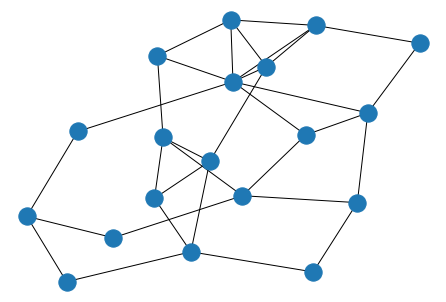

In [103]:
import networkx as nx

routes = [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

G = nx.Graph(routes)

nx.draw(G)

diameter = nx.diameter(G)

print("The most hops a traveler could do is {d} hops".format(d=diameter))

print("To find wich city would be the most efficient")
print("would be to find the center of the graph")
center = nx.center(G)
print("This would mean living in {c}, or in another sense, the most connected cities".format(c=center))

# Exercise 2

Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```

G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```


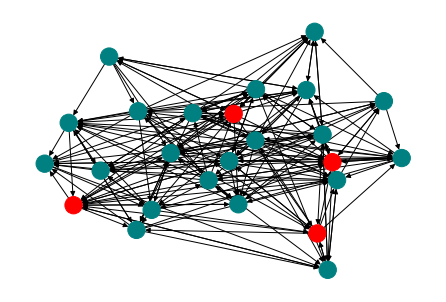

In [123]:
import networkx as nx
import random

G = nx.binomial_graph(25, 0.3, directed=True)

def random_walk(G, node_id, steps, returns=[]):
    if len(returns) == steps: return returns
    neighbors = list(nx.all_neighbors(G, node_id))
    next_i = random.randint(0, len(neighbors) - 1)
    returns.append(neighbors[next_i])
    return random_walk(G, next_i, steps, returns)

steps = random_walk(G, 3, 5)
uniques = set(steps)
colors = []
for node in G:
    colors.append('red' if node in uniques else 'teal')

nx.draw(G, node_color=colors)
    

## Exercise 2.2

Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 

- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`.

Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [133]:
import numpy as np

"""
We use numpy's weighed choice method
given the distribution as the node we're at
"""
def random_neighor(G, at):
    distri = G[at]
    return np.random.choice(np.arange(0, len(distri)), p=distri)

def random_walk(G, node_id, steps, returns=[]):
    if len(returns) == steps: return returns
    next_i = random_neighor(G, node_id)
    returns.append(next_i)
    return random_walk(G, next_i, steps, returns)

G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])
random_walk(G, 0, 4)

[1, 3, 0, 1]


# (stretch) Exercise 3: Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm uses breadth first search to find the **shortest path** between two nodes in a graph.

It goes like this:

----

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.

3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.

4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.

6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

----

Here is a GIF of it in action:

![](Dijkstras_progress_animation.gif)

Implement `shortest_path(G, start_node, end_node)` which takes in a networkX graph, a starting node and an end node and outputs a list of nodes which is the shortest path between the start and end.

You can use networkX's shortest path function to test your result, but not to implement it.

In [24]:
import networkx as nx

def make_simple_graph():
    G = nx.Graph([])
    G.add_edge("A","C")
    G.add_edge("A","E")
    G.add_edge("C","E")
    G.add_edge("D","E")
    G.add_edge("A","D")
    G.add_edge("B","D")
    return G

G = make_simple_graph()

shortest_l = len(G.nodes) * 2

def shortest_path(G, start_node, end_node):
    print(G.edges)
    global shortest_l
#     global number
    shortest_paths = [start_node]
    
    def iterate(at, visited_list=None, visited=None):
        global shortest_l
        temp_list = [] if visited_list is None else visited_list.copy()
        temp = set() if visited is None else visited.copy()
        neighors = set()
#         leng = len(shortest_paths)
        if at in temp: return
        temp.add(at)
        temp_list.append(at)
        for neighbor in G.neighbors(at):
            if end_node == neighbor:
                temp.add(neighbor)
                temp_list.append(neighbor)
                if len(temp_list) < shortest_l:
                    shortest_paths = temp_list
                    shortest_l = len(shortest_paths)
                    return
            if neighbor not in temp and neighbor is not start_node:
                neighors.add(neighbor)
        for neighbor in (neighors - temp):
            iterate(neighbor, temp_list, temp)
        return
                
    iterate(start_node, shortest_paths)
    return shortest_paths

path = shortest_path(G, "C", "D")
print(path)

[('A', 'C'), ('A', 'E'), ('A', 'D'), ('C', 'E'), ('E', 'D'), ('D', 'B')]
['C']
